In [25]:
from scipy.fftpack import idct
import cv2 as cv2
import matplotlib.pylab as plt

# load stored objects from disk

In [26]:
class CompressedImage:
    def __init__(self,size0, size1, code_y,code_u,code_v,h_encoded_y,h_encoded_u,h_encoded_v ):
        self.size0=size0
        self.size1=size1

        self.code_y=code_y
        self.code_u=code_u
        self.code_v=code_v

        self.h_encoded_y=h_encoded_y
        self.h_encoded_u=h_encoded_u
        self.h_encoded_v=h_encoded_v

In [27]:
#for optimal performance, use cPickle if available. If not, use pickle
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle
    
with open('test.bin', 'rb') as inp:
    compressed_image = pickle.load(inp)

# huffman decoding

In [28]:
import numpy


print("huffman decoding running for layer y")
h_decoded_y = numpy.array(compressed_image.code_y.decode(compressed_image.h_encoded_y)).reshape(compressed_image.size0, compressed_image.size1)

print("huffman decoding running for layer u")
h_decoded_u = numpy.array(compressed_image.code_u.decode(compressed_image.h_encoded_u)).reshape(compressed_image.size0, compressed_image.size1)

print("huffman decoding running for layer v")
h_decoded_v = numpy.array(compressed_image.code_v.decode(compressed_image.h_encoded_v)).reshape(compressed_image.size0, compressed_image.size1)


huffman decoding running for layer y
huffman decoding running for layer u
huffman decoding running for layer v


# decode idct

<ipython-input-29-f868426fc4a6>:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot("111"), plt.imshow(cv2.cvtColor(image_merge, cv2.COLOR_YUV2RGB)), plt.title("compressed")


(<AxesSubplot:title={'center':'compressed'}>,
 Text(0.5, 1.0, 'compressed'))

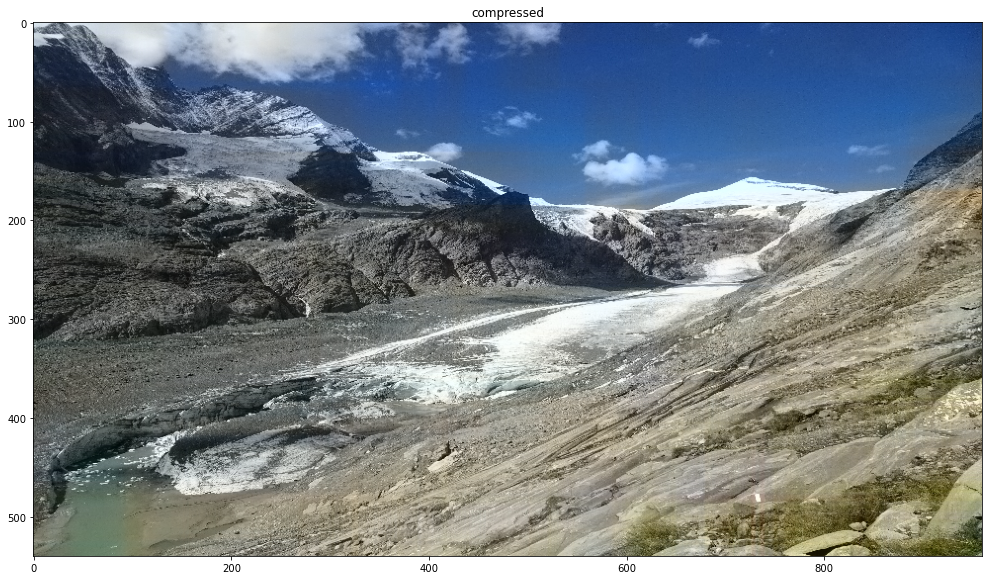

In [29]:
def idct2(a):  #a simple helper function for idct2
    return idct(idct(a.T, norm='ortho').T, norm='ortho')


def decompress_layer(layer):
    img_idct = idct2(layer)
    return img_idct.astype('uint8')


decoded_y = decompress_layer(h_decoded_y)
decoded_u = decompress_layer(h_decoded_u)
decoded_v = decompress_layer(h_decoded_v)


image_merge = cv2.merge([decoded_y,  #Y
                         decoded_u,  #U
                         decoded_v])  #V
plt.figure(figsize=(17, 17))
plt.subplot("111"), plt.imshow(cv2.cvtColor(image_merge, cv2.COLOR_YUV2RGB)), plt.title("compressed")


In [32]:
cv2.imwrite("rec.png",cv2.cvtColor(image_merge, cv2.COLOR_YUV2BGR))# store the image to disk

True